# Assignment 2: K-Means & DBSCAN

1. Retrieve and load the Olivetti faces dataset

In [1]:
from sklearn.datasets import fetch_olivetti_faces

# Load Olivetti faces dataset
data = fetch_olivetti_faces(shuffle=True, random_state=86)
X, y = data.data, data.target

2. Split the training set, a validation set, and a test set using stratified sampling to ensure that there are the same number of images per person in each set. Provide your rationale for the split ratio [10 points]

In [2]:
from sklearn.model_selection import train_test_split

# 60% training, 20% validation, 20% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=86)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=86)

3. Using k-fold cross validation, train a classifier to predict which person is represented in each picture, and evaluate it on the validation set.

In [3]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Initialize the classifier
clf = SVC(kernel='linear', random_state=86)

# Perform k-fold cross-validation
skf = StratifiedKFold(n_splits=5)
scores = cross_val_score(clf, X_train, y_train, cv=skf)

# Train on the full training set and evaluate on the validation set
clf.fit(X_train, y_train)
val_score = clf.score(X_val, y_val)

print(f'Cross-validation scores: {scores}')
print(f'Validation score: {val_score}')

Cross-validation scores: [0.91666667 0.875      0.9375     0.89583333 0.9375    ]
Validation score: 0.95


4. Use K-Means to reduce the dimensionality of the set. Provide your rationale for the similarity measure used to perform the clustering. Use the silhouette score approach to choose the number of clusters.

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Determine the optimal number of clusters using silhouette score
sil_scores = []
k_range = range(2, 70)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=86)
    kmeans.fit(X_train)
    sil_scores.append(silhouette_score(X_train, kmeans.labels_))

optimal_k = k_range[sil_scores.index(max(sil_scores))]
print(f'Optimal number of clusters: {optimal_k}')

# Apply K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
X_train_reduced = kmeans.fit_transform(X_train)
X_val_reduced = kmeans.transform(X_val)
X_test_reduced = kmeans.transform(X_test)


Optimal number of clusters: 69


5. Use the set from step (4) to train a classifier as in step (3)   

In [5]:
# Perform k-fold cross-validation on the reduced dataset
clf = SVC(kernel='linear', random_state=86)
scores_reduced = cross_val_score(clf, X_train_reduced, y_train, cv=skf)

# Train on the full reduced training set and evaluate on the reduced validation set
clf.fit(X_train_reduced, y_train)
val_score_reduced = clf.score(X_val_reduced, y_val)

print(f'Cross-validation scores on reduced data: {scores_reduced}')
print(f'Validation score on reduced data: {val_score_reduced}')

Cross-validation scores on reduced data: [0.8125     0.8125     0.83333333 0.79166667 0.83333333]
Validation score on reduced data: 0.875


6. Apply DBSCAN (Density-Based Spatial Clustering of Applications with Noise) algorithm to the Olivetti Faces dataset for clustering. Preprocess the images and convert them into feature vectors, then use DBSCAN to group similar images together based on their density. Provide your rationale for the similarity measure used to perform the clustering, considering the nature of facial image data.

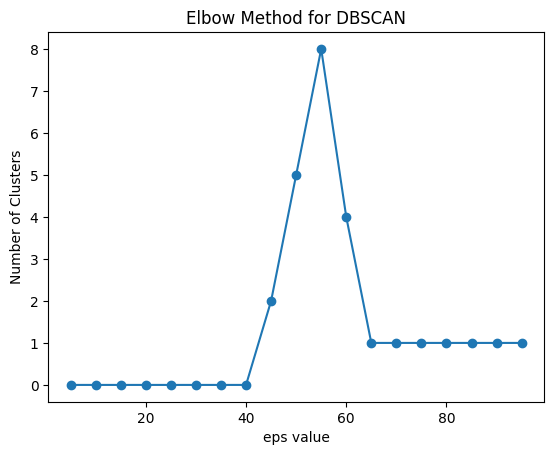

In [6]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Standardize the data
X_train_scaled = StandardScaler().fit_transform(X_train)

eps_values = []
n_clusters_list = []

for eps in range(5, 100, 5): 
    dbscan = DBSCAN(eps=eps, min_samples=5)
    dbscan_labels = dbscan.fit_predict(X_train_scaled)
    
    n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    eps_values.append(eps)
    n_clusters_list.append(n_clusters)

# Plot to find the "elbow"
import matplotlib.pyplot as plt

plt.plot(eps_values, n_clusters_list, marker='o')
plt.xlabel('eps value')
plt.ylabel('Number of Clusters')
plt.title('Elbow Method for DBSCAN')
plt.show()

In [7]:
# Iterate over the eps range 
for eps in range(40, 60, 5):  
    dbscan_optimal = DBSCAN(eps=eps, min_samples=5)
    dbscan_labels_optimal = dbscan_optimal.fit_predict(X_train_scaled)
    
    # Count the number of clusters and noise points
    n_clusters_optimal = len(set(dbscan_labels_optimal)) - (1 if -1 in dbscan_labels_optimal else 0)
    n_noise_optimal = list(dbscan_labels_optimal).count(-1)

    # Print results for each eps value
    print(f'For eps={eps}:')
    print(f' - Number of clusters: {n_clusters_optimal}')
    print(f' - Number of noise points: {n_noise_optimal}')
    print('-' * 30)

For eps=40:
 - Number of clusters: 0
 - Number of noise points: 240
------------------------------
For eps=45:
 - Number of clusters: 2
 - Number of noise points: 225
------------------------------
For eps=50:
 - Number of clusters: 5
 - Number of noise points: 165
------------------------------
For eps=55:
 - Number of clusters: 8
 - Number of noise points: 106
------------------------------
